## Problem Statement
### This is a Customer Segmentation project based on the Monetory, Frequency and Recency of the customers so that the company targets their customers effeciently and enhance their business.
- #### Monetory - Total amount of transactions
- #### Frequency - Number of transactions
- #### Recency - Number of days since last purchased

## About Dataset
### This dataset contains the customer transaction information from 01-12-2010 to 09-12-2011 for a UK based online retail store.
#### Features in the dataset
- InvoiceNo
- StockCode
- Description
- Quantity
- InvoiceDate
- UnitPrice
- CustomerID
- Country

#### Importing python dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
customer_df=pd.read_csv('CustomerDataset.csv',sep=',',encoding='ISO-8859-1',header=0)
# displaying head
customer_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [4]:
# rows and columns in dataset
customer_df.shape

(541909, 8)

In [5]:
# columns in dataset
customer_df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [6]:
# dataset infromation
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
# Statistics of dataset
customer_df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [8]:
# Check for null data
customer_df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [9]:
# Percentage of null data in each column
null_check=round(100*(customer_df.isnull().sum()/len(customer_df)),2)
null_check

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

### Data Cleaning

In [10]:
# Handling null value in candidateID
customer_df.CustomerID.fillna(round(np.mean(customer_df['CustomerID']),0),inplace=True)
round(100*(customer_df.isnull().sum()/len(customer_df)),2)

InvoiceNo      0.00
StockCode      0.00
Description    0.27
Quantity       0.00
InvoiceDate    0.00
UnitPrice      0.00
CustomerID     0.00
Country        0.00
dtype: float64

In [11]:
# dropping null data
customer_df.dropna(inplace=True)
customer_df.shape

(540455, 8)

In [12]:
# changing the dtype of customerID
customer_df['CustomerID'] = customer_df['CustomerID'].astype(str)
customer_df.info()
customer_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 540455 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    540455 non-null  object 
 1   StockCode    540455 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     540455 non-null  int64  
 4   InvoiceDate  540455 non-null  object 
 5   UnitPrice    540455 non-null  float64
 6   CustomerID   540455 non-null  object 
 7   Country      540455 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 37.1+ MB


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [13]:
# Adding new column Monetory

customer_df['TotalAmount']=customer_df['Quantity']*customer_df['UnitPrice']
customer_df_m = customer_df.groupby('CustomerID')['TotalAmount'].sum()
customer_df_m = customer_df_m.reset_index()
customer_df_m.head()

,CustomerID,TotalAmount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [14]:
# Adding new column Frequency

customer_df_f = customer_df.groupby('CustomerID')['InvoiceNo'].count()
customer_df_f = customer_df_f.reset_index()
customer_df_f.columns = ['CustomerID','Frequency']
customer_df_f.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [15]:
# Merging both the monetory and frequency dataframe

customer_df_mf = pd.merge(customer_df_m,customer_df_f, on='CustomerID', how='inner')
customer_df_mf.head()

,CustomerID,TotalAmount,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [16]:
# Creating a new attribute Recency

# Datetime convertion to proper datetime

customer_df['InvoiceDate'] = pd.to_datetime(customer_df['InvoiceDate'],format='%d-%m-%Y %H:%M')

In [17]:
customer_df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [18]:
# Compute the maximum date to know the last transaction data

max_date = max(customer_df['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [19]:
# Compute the difference between the max and last transaction date

customer_df['diff'] = max_date-customer_df['InvoiceDate']
customer_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [20]:
customer_df_r = customer_df.groupby('CustomerID')['diff'].min()
customer_df_r = customer_df_r.reset_index()
customer_df_r.head()

,CustomerID,diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [21]:
customer_df_r['diff'] = customer_df_r['diff'].dt.days
customer_df_r.head()

,CustomerID,diff
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


### Final Dataframe to work on

In [22]:
# Merging the dataframes to get final RFM dataframe 

customer_df_mfr = pd.merge(customer_df_mf, customer_df_r, on='CustomerID', how='inner')
customer_df_mfr.columns = ['CustomerID','TotalAmount','Frequency','Recency']
customer_df_mfr.head()

,CustomerID,TotalAmount,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


Text(0.5, 0, 'Range')

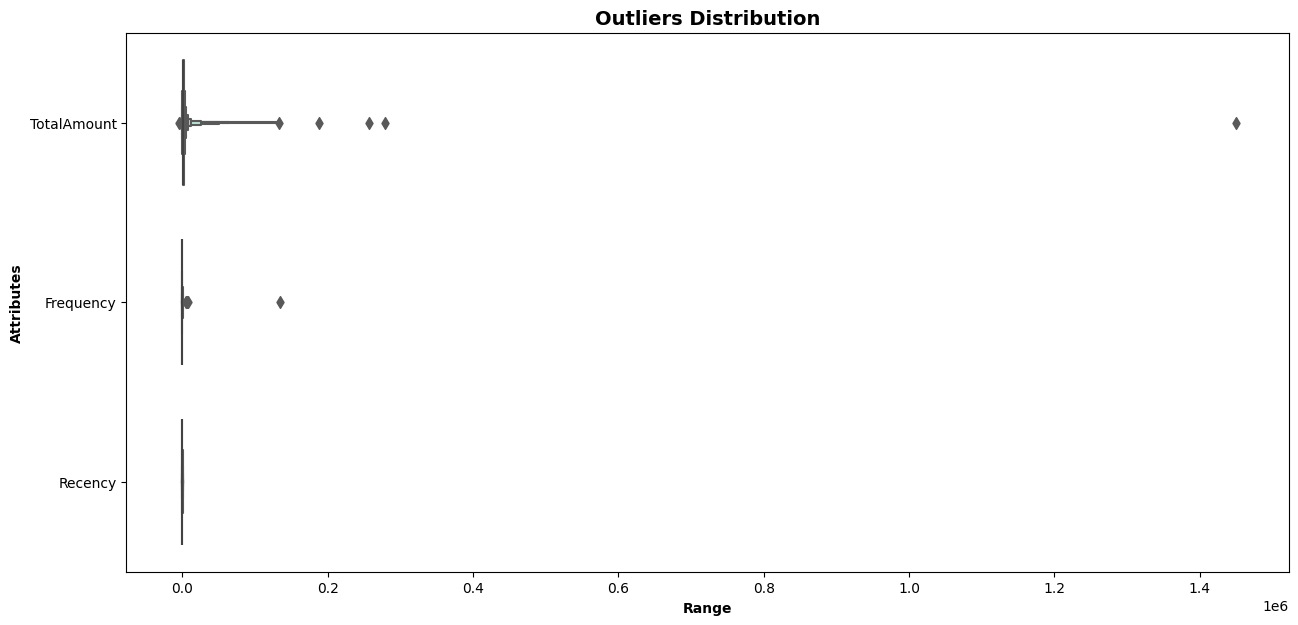

In [23]:
# Visualizing Outliers for TotalAmount, Frequency and Recency

attributes = ['TotalAmount','Frequency','Recency']
plt.figure(figsize=(15,7))
sns.boxenplot(data=customer_df_mfr[attributes],orient='h',palette='Set2',saturation=1, width=0.7)
plt.title('Outliers Distribution', fontsize = 14, fontweight = 'bold')
plt.ylabel('Attributes', fontweight='bold')
plt.xlabel('Range', fontweight='bold')

### Outliers Removal

In [24]:
# Removing outliers for TotalAmount
Q1 = customer_df_mfr.TotalAmount.quantile(0.05)
Q3 = customer_df_mfr.TotalAmount.quantile(0.95)
IQR = Q3-Q1
customer_df_mfr = customer_df_mfr[(customer_df_mfr.TotalAmount >= Q1-1.5*IQR) & (customer_df_mfr.TotalAmount <= Q3+1.5*IQR)]

# Removing outliers for Frequency
Q1 = customer_df_mfr.Frequency.quantile(0.05)
Q3 = customer_df_mfr.Frequency.quantile(0.95)
IQR = Q3-Q1
customer_df_mfr = customer_df_mfr[(customer_df_mfr.Frequency >= Q1-1.5*IQR) & (customer_df_mfr.Frequency <= Q3+1.5*IQR)]

# Removing outliers for Recency
Q1 = customer_df_mfr.Recency.quantile(0.05)
Q3 = customer_df_mfr.Recency.quantile(0.95)
IQR = Q3-Q1
customer_df_mfr = customer_df_mfr[(customer_df_mfr.Recency >= Q1-1.5*IQR) & (customer_df_mfr.Recency <= Q3+1.5*IQR)]

customer_df_mfr.head()

,CustomerID,TotalAmount,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


### Scaling the features

In [25]:
customer_df_mfr = customer_df_mfr[['TotalAmount','Frequency','Recency']]

scaler = StandardScaler()
customer_df_mfr_scaled = scaler.fit_transform(customer_df_mfr)
customer_df_mfr_scaled.shape

(4293, 3)

In [26]:
customer_df_mfr_scaled = pd.DataFrame(customer_df_mfr_scaled)

customer_df_mfr_scaled.columns=['TotalAmount','Frequency','Recency']
customer_df_mfr_scaled.head()

,TotalAmount,Frequency,Recency
0,-0.720947,-0.752972,2.301550
1,1.719731,1.041498,-0.906307
2,0.296799,-0.463863,-0.183549
3,0.274323,-0.045153,-0.737993
4,-0.531582,-0.603433,2.143138


### Model Building
#### k-Means Algorithm

##### Randomly choosing n_clusters=4

In [27]:
# Training the model

kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(customer_df_mfr_scaled)

KMeans(max_iter=50, n_clusters=4)

In [28]:
kmeans.labels_

array([2, 3, 1, ..., 2, 1, 1])

In [29]:
set(kmeans.labels_)

{0, 1, 2, 3}

#### Choosing number of clusters

In [30]:
# Finding wcss value for different number of clusters

wcss = []

for cluster in range(1,11):
    kmeans=KMeans(n_clusters=cluster, max_iter=50, random_state=42)
    kmeans.fit(customer_df_mfr_scaled)

    wcss.append(kmeans.inertia_)

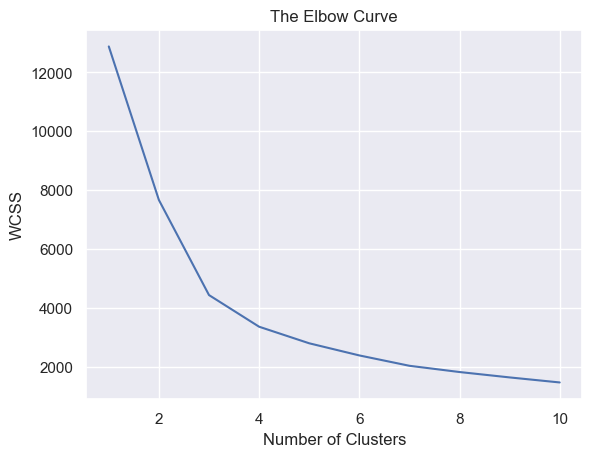

In [31]:
# Plot an elbow graph

sns.set()
plt.plot(range(1,11),wcss)
plt.title('The Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [32]:
# Training the model after verifying the n_cluster=4
kmeans = KMeans(n_clusters=4, init='k-means++')
kmeans.fit(customer_df_mfr_scaled)

KMeans(n_clusters=4)

In [33]:
y= kmeans.predict(customer_df_mfr_scaled)
y

array([2, 3, 1, ..., 2, 1, 1])

In [34]:
customer_df_mfr_scaled['Cluster_Id'] = y
customer_df_mfr_scaled.head()

,TotalAmount,Frequency,Recency,Cluster_Id
0,-0.720947,-0.752972,2.301550,2
1,1.719731,1.041498,-0.906307,3
2,0.296799,-0.463863,-0.183549,1
3,0.274323,-0.045153,-0.737993,1
4,-0.531582,-0.603433,2.143138,2


### Validating Clustering Model

In [35]:
# Calculate the silhouette score
silhouette_avg = silhouette_score(customer_df_mfr_scaled, y)
print('The average silhouette score is:', silhouette_avg)


The average silhouette score is: 0.6144240125725271


### Saving the model

In [36]:
import pickle

# Define filename for pickle file
filename = 'kmeans_model.pkl'

# Open file in write mode
with open('kmeans_model.pkl','wb') as file:
    # Save the model
    pickle.dump(kmeans,file)

# Close the file
file.close()

pickle.dump(kmeans,open('kmeans_model.pkl','wb'))


#### Visualizing Cluster_Id and TotalAmount

<Axes: xlabel='Cluster_Id', ylabel='TotalAmount'>

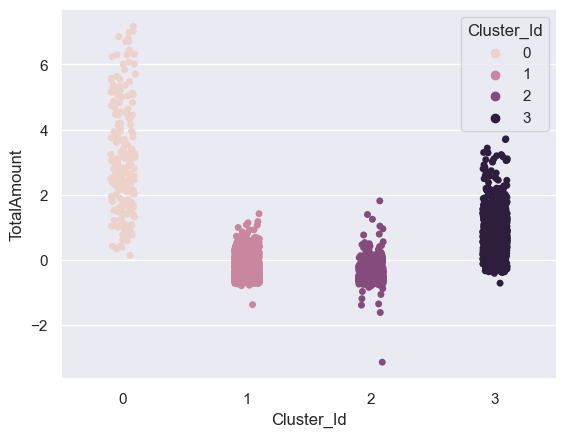

In [37]:
sns.stripplot(data=customer_df_mfr_scaled, x = 'Cluster_Id',y = 'TotalAmount', hue = 'Cluster_Id')

- #### Cluster_Id 0 is the group of customer who spends the most on purchasing from the company followed by Cluster_Id 3

<Axes: xlabel='Cluster_Id', ylabel='Frequency'>

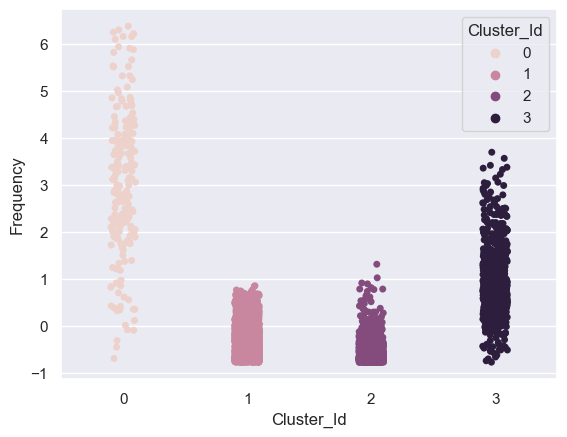

In [38]:
sns.stripplot(data=customer_df_mfr_scaled, x = 'Cluster_Id',y = 'Frequency', hue='Cluster_Id')

- #### Cluster_Id 0 is the group of customer who visits most frequently within short spans for purchasing from the company followed by Cluster_Id 3

<Axes: xlabel='Cluster_Id', ylabel='Recency'>

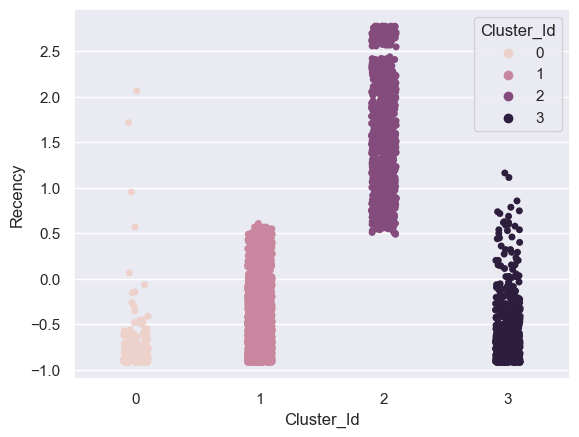

In [39]:
sns.stripplot(data=customer_df_mfr_scaled, x = 'Cluster_Id',y = 'Recency', hue='Cluster_Id')

- #### Cluster_Id 2 is the group of customers who visited the company and the number of days since they last purchased is very very high

### Conclusion
- #### The company should work on providing more discounts and some sorts of cuopons to attract this group of customers so that the company's benefits by making more revenues.